# **Gajendra Singh 22566009**

## part 2

## after getting fewer stocks by selecting it from our **Selection model file** we can make our portfolio using CAPM and gives weightage to each asset (using past data) having greater sharpe ratio

### this model can be used for long term or short terrm to give weightage to each asset.
### here Im using one time investment example

In [1]:
import pandas_datareader.data as web
import datetime
import math
import numpy as np
from datetime import date,timedelta
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.metrics import mean_absolute_error , mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM , Dense
import tensorflow as tf
import seaborn as sns
sns.set_style('white',{'axes.spines.right' : False , 'axes.spines.top':False})
import yfinance as yf

In [2]:
import pandas as pd
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [3]:
start = datetime.datetime(2018,12,12)
end = datetime.datetime(2021,12,15)

In [4]:
def get_stock(symbol):
    data = yf.download(symbol,start = start,end = end ,  interval ='1d')
    data[f'{symbol}'] = data["Adj Close"]
    data = data[[f'{symbol}']]
    print(data.head())
    return data

In [5]:
from functools import reduce

def combine_stocks(symbols):
    data_frames = []
    for i in symbols:
        data_frames.append(get_stock(i))
        
    df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['Date'], how='outer'), data_frames)
    print(df_merged.head())
    return df_merged

# these below stocks I got from selction model (that is in another ipynb file ) by filtering out using RSI than Bollinger bands

In [6]:
stocks = [ "PFE", "JNJ", "GOOGL", "NIO","MRNA",
           "AAPL", "COST", "WMT", "KR", "JPM",
          "BAC", "HSBC","NVDA","TSLA","PEP","TMUS","ADBE","TXN","NFLX","SBUX"]
portfolio = combine_stocks(stocks)

[*********************100%***********************]  1 of 1 completed
                  PFE
Date                 
2018-12-12  35.846779
2018-12-13  36.179596
2018-12-14  35.554543
2018-12-17  34.994442
2018-12-18  34.418098
[*********************100%***********************]  1 of 1 completed
                   JNJ
Date                  
2018-12-12  131.433365
2018-12-13  132.094543
2018-12-14  118.835052
2018-12-17  115.386162
2018-12-18  116.529839
[*********************100%***********************]  1 of 1 completed
                GOOGL
Date                 
2018-12-12  53.686501
2018-12-13  53.676998
2018-12-14  52.585499
2018-12-17  51.282501
2018-12-18  52.170502
[*********************100%***********************]  1 of 1 completed
             NIO
Date            
2018-12-12  7.54
2018-12-13  7.75
2018-12-14  7.70
2018-12-17  7.03
2018-12-18  7.07
[*********************100%***********************]  1 of 1 completed
             MRNA
Date             
2018-12-12  18.68
2018-12-13  1

In [7]:
# Log of percentage change
cov_matrix = portfolio.pct_change().apply(lambda x: np.log(1+x)).cov()
cov_matrix

,PFE,JNJ,GOOGL,NIO,MRNA,AAPL,COST,WMT,KR,JPM,BAC,HSBC,NVDA,TSLA,PEP,TMUS,ADBE,TXN,NFLX,SBUX
PFE,0.000299,0.000136,0.000120,0.000046,0.000149,0.000136,0.000090,0.000085,0.000052,0.000156,0.000164,0.000081,0.000145,0.000093,0.000133,0.000099,0.000126,0.000131,0.000065,0.000136
JNJ,0.000136,0.000204,0.000122,0.000063,0.000078,0.000146,0.000110,0.000093,0.000069,0.000142,0.000155,0.000091,0.000148,0.000091,0.000143,0.000098,0.000135,0.000142,0.000092,0.000130
GOOGL,0.000120,0.000122,0.000355,0.000261,0.000051,0.000278,0.000140,0.000105,0.000048,0.000209,0.000230,0.000131,0.000360,0.000306,0.000159,0.000190,0.000298,0.000248,0.000232,0.000222
NIO,0.000046,0.000063,0.000261,0.003184,0.000324,0.000317,0.000143,0.000056,0.000106,0.000252,0.000283,0.000149,0.000490,0.000841,0.000042,0.000157,0.000343,0.000330,0.000275,0.000177
MRNA,0.000149,0.000078,0.000051,0.000324,0.002660,0.000095,0.000088,0.000089,0.000092,-0.000053,-0.000039,-0.000048,0.000208,0.000186,0.000046,0.000058,0.000099,0.000099,0.000091,-0.000031
AAPL,0.000136,0.000146,0.000278,0.000317,0.000095,0.000472,0.000179,0.000133,0.000077,0.000224,0.000248,0.000138,0.000444,0.000418,0.000192,0.000200,0.000338,0.000300,0.000265,0.000246
COST,0.000090,0.000110,0.000140,0.000143,0.000088,0.000179,0.000204,0.000132,0.000094,0.000106,0.000115,0.000059,0.000217,0.000175,0.000137,0.000116,0.000195,0.000167,0.000145,0.000125
WMT,0.000085,0.000093,0.000105,0.000056,0.000089,0.000133,0.000132,0.000197,0.000109,0.000096,0.000112,0.000055,0.000164,0.000096,0.000130,0.000097,0.000135,0.000133,0.000114,0.000103
KR,0.000052,0.000069,0.000048,0.000106,0.000092,0.000077,0.000094,0.000109,0.000375,0.000044,0.000067,0.000024,0.000078,0.000069,0.000076,0.000067,0.000080,0.000061,0.000066,0.000036
JPM,0.000156,0.000142,0.000209,0.000252,-0.000053,0.000224,0.000106,0.000096,0.000044,0.000498,0.000516,0.000278,0.000256,0.000255,0.000177,0.000189,0.000193,0.000262,0.000098,0.000281


In [8]:
corr_matrix = portfolio.pct_change().apply(lambda x: np.log(1+x)).corr()
corr_matrix

,PFE,JNJ,GOOGL,NIO,MRNA,AAPL,COST,WMT,KR,JPM,BAC,HSBC,NVDA,TSLA,PEP,TMUS,ADBE,TXN,NFLX,SBUX
PFE,1.000000,0.548915,0.369433,0.047244,0.167187,0.362457,0.363763,0.349259,0.153818,0.404437,0.382847,0.255606,0.275019,0.126531,0.500816,0.303106,0.325933,0.360210,0.154781,0.397898
JNJ,0.548915,1.000000,0.455160,0.077615,0.106301,0.471738,0.540447,0.466614,0.248866,0.447047,0.438906,0.346900,0.341304,0.150664,0.650807,0.366218,0.423599,0.474288,0.264755,0.460680
GOOGL,0.369433,0.455160,1.000000,0.246007,0.052233,0.680297,0.520497,0.395375,0.131506,0.496302,0.493399,0.377854,0.629531,0.383267,0.551120,0.536960,0.708923,0.626070,0.505062,0.595339
NIO,0.047244,0.077615,0.246007,1.000000,0.111331,0.259041,0.177611,0.071340,0.096597,0.199802,0.202288,0.142986,0.285558,0.351133,0.048841,0.147759,0.271934,0.278322,0.200151,0.158034
MRNA,0.167187,0.106301,0.052233,0.111331,1.000000,0.084923,0.119650,0.122686,0.091720,-0.045654,-0.030894,-0.050719,0.132998,0.084861,0.057842,0.059753,0.086202,0.091205,0.072665,-0.030691
AAPL,0.362457,0.471738,0.680297,0.259041,0.084923,1.000000,0.576773,0.436875,0.182405,0.462288,0.461527,0.345167,0.673165,0.454076,0.574674,0.489337,0.696490,0.659190,0.501465,0.572886
COST,0.363763,0.540447,0.520497,0.177611,0.119650,0.576773,1.000000,0.659119,0.338896,0.333203,0.324658,0.222639,0.499654,0.289283,0.625951,0.431116,0.609457,0.556397,0.416284,0.440057
WMT,0.349259,0.466614,0.395375,0.071340,0.122686,0.436875,0.659119,1.000000,0.400709,0.308141,0.322428,0.210814,0.383805,0.161580,0.603408,0.368328,0.430864,0.450372,0.334340,0.368697
KR,0.153818,0.248866,0.131506,0.096597,0.091720,0.182405,0.338896,0.400709,1.000000,0.101049,0.139851,0.067362,0.132883,0.084073,0.256457,0.184321,0.184749,0.150936,0.139456,0.092751
JPM,0.404437,0.447047,0.496302,0.199802,-0.045654,0.462288,0.333203,0.308141,0.101049,1.000000,0.933699,0.677400,0.378173,0.269496,0.517005,0.451381,0.386252,0.558268,0.179620,0.634441


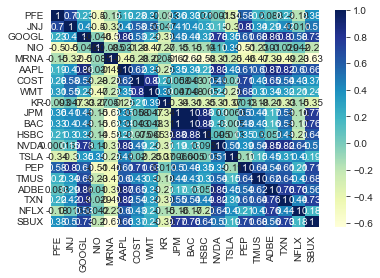

In [9]:
import seaborn as sb
dataplot = sb.heatmap(corr_matrix.corr(),cmap="YlGnBu", annot=True)

## here we can use our **third filter** by seeing covariance matrix heatmap we will make a well diversified portfoilio|
MRNA,KR,kdp,jnj,cost,tsla

In [10]:
final_stocks = [  "JNJ", "MRNA",
                 "COST", "KR",
                 "TSLA","KDP"]
final_portfolio = combine_stocks(final_stocks)

[*********************100%***********************]  1 of 1 completed
                   JNJ
Date                  
2018-12-12  131.433365
2018-12-13  132.094543
2018-12-14  118.835052
2018-12-17  115.386162
2018-12-18  116.529839
[*********************100%***********************]  1 of 1 completed
             MRNA
Date             
2018-12-12  18.68
2018-12-13  18.76
2018-12-14  18.32
2018-12-17  17.00
2018-12-18  17.00
[*********************100%***********************]  1 of 1 completed
                  COST
Date                  
2018-12-12  214.513229
2018-12-13  213.298477
2018-12-14  194.982910
2018-12-17  190.434616
2018-12-18  191.150299
[*********************100%***********************]  1 of 1 completed
                   KR
Date                 
2018-12-12  27.193014
2018-12-13  27.202158
2018-12-14  27.010202
2018-12-17  26.434349
2018-12-18  26.096151
[*********************100%***********************]  1 of 1 completed
                 TSLA
Date                 
2018-12-1

In [11]:
#final_portfolio

In [12]:
final_cov_matrix = final_portfolio.pct_change().apply(lambda x: np.log(1+x)).cov()
final_cov_matrix

,JNJ,MRNA,COST,KR,TSLA,KDP
JNJ,0.000204,0.000078,0.000110,0.000069,0.000091,0.000065
MRNA,0.000078,0.002660,0.000088,0.000092,0.000186,-0.000011
COST,0.000110,0.000088,0.000204,0.000094,0.000175,0.000091
KR,0.000069,0.000092,0.000094,0.000375,0.000069,0.000052
TSLA,0.000091,0.000186,0.000175,0.000069,0.001800,0.000228
KDP,0.000065,-0.000011,0.000091,0.000052,0.000228,0.000300


In [13]:
final_corr_matrix = final_portfolio.pct_change().apply(lambda x: np.log(1+x)).corr()
final_corr_matrix

,JNJ,MRNA,COST,KR,TSLA,KDP
JNJ,1.000000,0.106301,0.540447,0.248865,0.150664,0.264372
MRNA,0.106301,1.000000,0.119650,0.091720,0.084861,-0.012134
COST,0.540447,0.119650,1.000000,0.338897,0.289282,0.367977
KR,0.248865,0.091720,0.338897,1.000000,0.084073,0.155728
TSLA,0.150664,0.084861,0.289282,0.084073,1.000000,0.310479
KDP,0.264372,-0.012134,0.367977,0.155728,0.310479,1.000000


In [14]:
# Randomly weighted portfolio's variance
w = {'JNJ':0.166,'MRNA':0.167,'COST':0.166,'KR':0.166,'TSLA':0.166,'KDP':0.166,}
final_port_var = final_cov_matrix.mul(w, axis=0).mul(w, axis=1).sum().sum()
final_port_var

0.00023524352966599381

In [15]:
# Yearly returns for individual companies
ind_er = final_portfolio.resample('Y').last().pct_change().mean()
ind_er

JNJ     0.126579
MRNA    2.091652
COST    0.414028
KR      0.220778
TSLA    2.683223
KDP     0.134037
dtype: float64

In [16]:
# Portfolio returns
w = [0.166, 0.167, 0.166, 0.166,0.166, 0.166]
port_er = (w*ind_er).sum()
port_er

0.9433609966947533

In [17]:
# Volatility is given by the annual standard deviation. We multiply by 250 because there are 250 trading days/year.
ann_sd = final_portfolio.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(250))
ann_sd

JNJ     0.225642
MRNA    0.815497
COST    0.225877
KR      0.306290
TSLA    0.670889
KDP     0.273804
dtype: float64

In [18]:
assets = pd.concat([ind_er, ann_sd], axis=1) # Creating a table for visualising returns and volatility of assets
assets.columns = ['Returns', 'Volatility']
assets

,Returns,Volatility
JNJ,0.126579,0.225642
MRNA,2.091652,0.815497
COST,0.414028,0.225877
KR,0.220778,0.306290
TSLA,2.683223,0.670889
KDP,0.134037,0.273804


In [19]:
p_ret = [] # Define an empty array for portfolio returns
p_vol = [] # Define an empty array for portfolio volatility
p_weights = [] # Define an empty array for asset weights

num_assets = len(final_portfolio.columns)
num_portfolios = 50000

In [20]:
for p in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights = weights/np.sum(weights)
    p_weights.append(weights)
    returns = np.dot(weights, ind_er) # Returns are the product of individual expected returns of asset and its 
                                      # weights 
    p_ret.append(returns)
    var = final_cov_matrix.mul(weights, axis=0).mul(weights, axis=1).sum().sum()# Portfolio Variance
    sd = np.sqrt(var) # Daily standard deviation
    ann_sd = sd*np.sqrt(250) # Annual standard deviation = volatility
    p_vol.append(ann_sd)

In [21]:
data = {'Returns':p_ret, 'Volatility':p_vol}

for counter, symbol in enumerate(final_portfolio.columns.tolist()):
    #print(counter, symbol)
    data[symbol + ' weight'] = [w[counter] for w in p_weights ]

In [22]:
final_portfolios  = pd.DataFrame(data)
final_portfolios.head() # Dataframe of the 100 portfolios created

,Returns,Volatility,JNJ weight,MRNA weight,COST weight,KR weight,TSLA weight,KDP weight
0,0.882951,0.229946,0.252153,0.097881,0.159587,0.135622,0.197214,0.157543
1,1.002075,0.259099,0.123443,0.179605,0.025592,0.255167,0.191458,0.224735
2,1.463890,0.343333,0.066076,0.281234,0.056647,0.232055,0.291783,0.072205
3,1.115066,0.277111,0.361260,0.198830,0.098888,0.003985,0.222211,0.114827
4,1.080461,0.267569,0.214855,0.194926,0.188528,0.034026,0.200338,0.167328


<AxesSubplot:xlabel='Volatility', ylabel='Returns'>

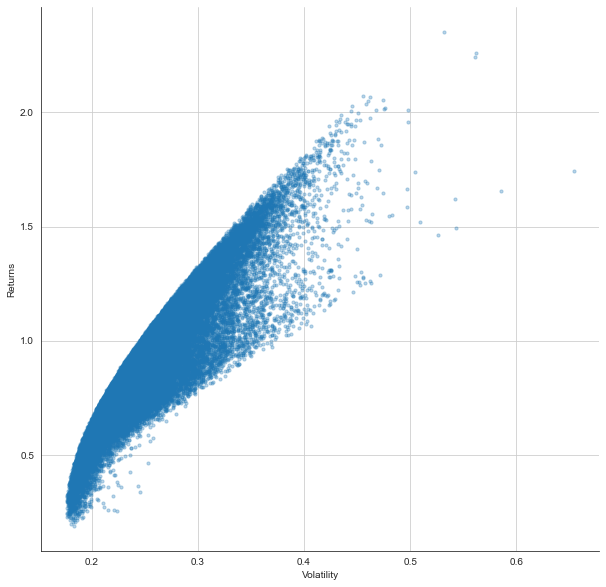

In [23]:
# Plot efficient frontier
final_portfolios.plot.scatter(x='Volatility', y='Returns', marker='o', s=10, alpha=0.3, grid=True, figsize=[10,10])

In [24]:
min_vol_port = final_portfolios.iloc[final_portfolios['Volatility'].idxmin()]
# idxmin() gives us the minimum value in the column specified.
min_vol_port

Returns        0.240405
Volatility     0.176442
JNJ weight     0.363511
MRNA weight    0.012404
COST weight    0.213607
KR weight      0.205897
TSLA weight    0.002797
KDP weight     0.201785
Name: 43214, dtype: float64

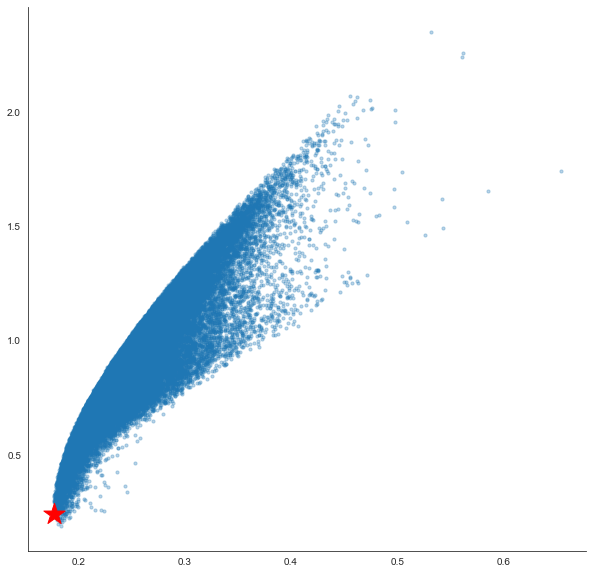

In [25]:
# plotting the minimum volatility portfolio
plt.subplots(figsize=[10,10])
plt.scatter(final_portfolios['Volatility'], final_portfolios['Returns'],marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=500)

In [31]:
# Finding the optimal portfolio
rf = 0.06 # risk factor
optimal_risky_port = final_portfolios.iloc[((final_portfolios['Returns']-rf)/final_portfolios['Volatility']).idxmax()]
optimal_risky_port

Returns        1.938379
Volatility     0.423197
JNJ weight     0.054294
MRNA weight    0.266948
COST weight    0.116029
KR weight      0.074003
TSLA weight    0.487708
KDP weight     0.001018
Name: 1589, dtype: float64

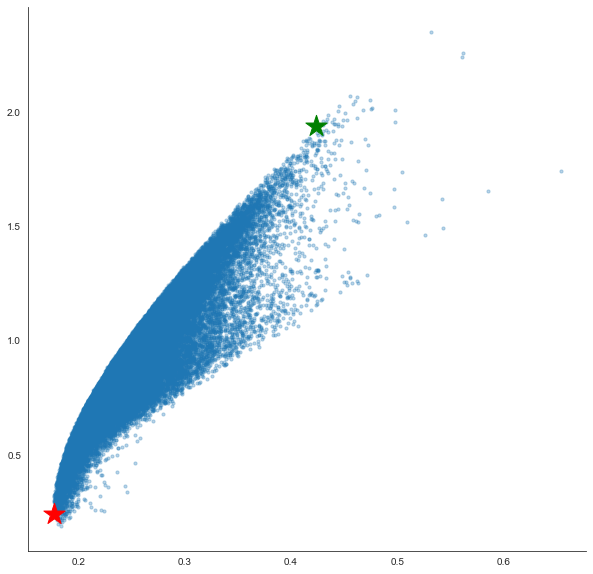

In [32]:
# Plotting optimal portfolio
plt.subplots(figsize=(10, 10))
plt.scatter(final_portfolios['Volatility'], final_portfolios['Returns'],marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=500)
plt.scatter(optimal_risky_port[1], optimal_risky_port[0], color='g', marker='*', s=500)

## in above example we got followings results

Returns        1.938379                                                                 
Volatility     0.423197                                                              
**sharpe ratio = 4.4385** ((1.938379 - 0.06)/.423197) 
risk free rate = 0.06


**weightage of stocks are below**                                                      
JNJ weight     0.054294                                                              
MRNA weight    0.266948                                                               
COST weight    0.116029                                                                 
KR weight      0.074003                                                       
TSLA weight    0.487708                                                            
KDP weight     0.001018                                                          
